In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
pd.set_option('display.max_colwidth', None)

# Loading Time Series Tables: Employment per Neighborhood

In [4]:
sal = pd.read_excel('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\salarios.xls', None)

In [5]:
sal.keys()

dict_keys(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])

In [7]:
keys = list(sal.keys())

# Cleaning

In [ ]:
0/2005: 0,1,3,5 / -10
...
10/2015: 0,1,2,3,5 / -10
11/2016: 0,1,3,5 / -10
...


In [ ]:
sal[keys[10]].tail(13)

# Tables 2005 to 2014:

In [57]:
sal_5to14 = [sal[keys[j]] for j in range(10)]

In [58]:
for i in range(10):
    
    df = sal_5to14[i].head(-10).tail(-2).dropna(how='any')
    df.columns = df.loc[2].values.tolist()
    df = df.tail(-1)
    
    sal_5to14[i] = df

In [59]:
[len(sal_5to14[i]) for i in range(10)]

[215, 215, 215, 215, 215, 215, 215, 215, 215, 215]

# Table 2015:

In [54]:
sal_2015 = sal['2015'].head(-10).tail(-3).dropna(how='any')
sal_2015.columns = sal_2015.loc[3].values
sal_2015 = sal_2015.tail(-1)

In [77]:
len(sal_2015)

215

# Tables 2016 on:

In [64]:
sal_16on = [sal[keys[j]] for j in range(11,14)]

In [65]:
for i in range(3):
    
    df = sal_16on[i].head(-10).tail(-2).dropna(how='any')
    df.columns = df.loc[2].values.tolist()
    df = df.tail(-1)
    
    sal_16on[i] = df

In [66]:
[len(sal_16on[i]) for i in range(3)]

[215, 215, 215]

# Testing

In [ ]:
sal_2015.iloc[:, 1:].replace('-', np.nan).astype(float)

# Adding The Year Column to Each Table

In [78]:
sals_list = sal_5to14 + [sal_2015] + sal_16on

In [81]:
for i in range(2005, 2019):
    
    df = sals_list[i-2005]
    
    df['Ano'] = [i for j in range(len(df))]
    df_cols = df.columns.values.tolist()
    df = df[[df_cols[-1]] + df_cols[:-1]]
    
    sals_list[i-2005] = df

# Combining Tables Vertically:

In [82]:
sals = pd.concat(sals_list, axis=0)

# Formatting and Type Conversion:

In [94]:
sals.iloc[:, 2:] = sals.iloc[:, 2:].replace('-', np.nan).astype(float)

# Saving/Loading Complete Time Series of Neighborhood Salary Mass:

In [95]:
#sals.to_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\sals_clean.csv', index=False)

In [96]:
sals = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\sals_clean.csv')

# Exploratory Analysis

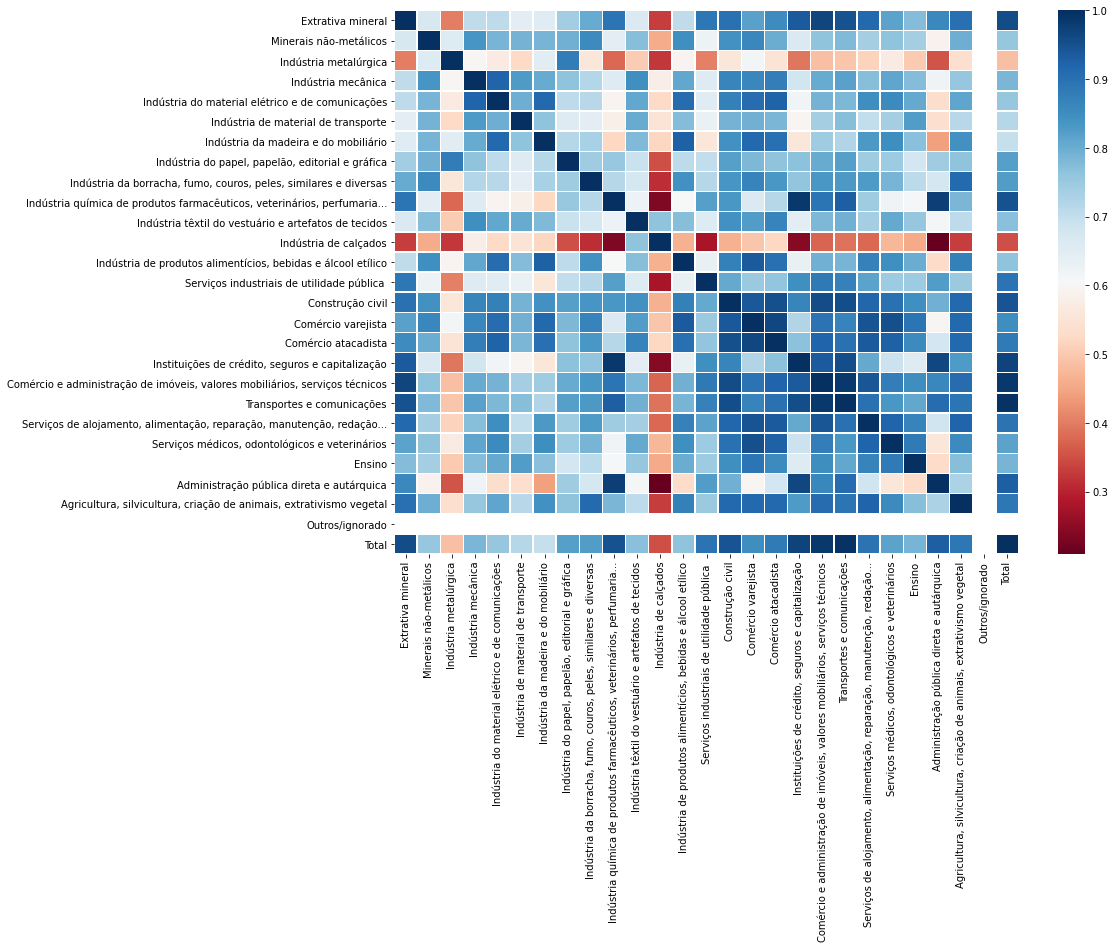

In [104]:
fig = plt.figure(figsize=(14, 10))
ax0 = fig.add_subplot(111)

sns.heatmap(sals.iloc[:, 2:][sals['Ano']==2018].corr(), cmap='RdBu', linewidths=0.5, ax=ax0)

#ax0.savefig